In [3]:
import pandas as pd
import numpy as np
from functools import partial
import mysql.connector
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd






#Cargas de CSV
dataframeAtletas = pd.read_csv("Olympic_Athlete.csv")
juegosOlimpicos = pd.read_csv("Olympic_Athlete_Event_Results.csv")



#Funcion para convertir a entero o que devuelva NA (1 para entero  2 para float)
def convertirNumero(valor , numero:int):
    try:
        if numero ==1:
            numero = int(valor)
        elif numero == 2:
            numero = float(valor)      
        return numero    
    except ValueError:
        return pd.NA

#Confuncion para devolver NA

def convertirNA(valor):
    if valor == "na":
        return pd.NA
    else:
        return valor
              


#establecer  elsegundo  parametro 
convertirFloat = partial(convertirNumero, numero=2)

#mapeo utiliza la funcion convertirFloat
columna = list( map ( convertirFloat, dataframeAtletas["height"] ))
#mapeo utiliza la funcion convertirFloat
columnaWeight = list( map ( convertirFloat, dataframeAtletas["weight"] ))
#mapeo para devolver NA 
columnaMedalla = list(map(convertirNA, juegosOlimpicos["medal"]))

#reemplazo de nuevas columnas
juegosOlimpicos["medal"] = columnaMedalla
dataframeAtletas["height"] = columna    
dataframeAtletas["weight"] = columnaWeight     

#suma los datos con na 
dataframeAtletas.iloc[[0]]  # sacar x fila
dataframeAtletas.iloc[1:10]  # sacar rangos de filas
dataframeAtletas["height"].mean()
dataframeAtletas.shape
juegosOlimpicos["medal"].value_counts() #conteo de elemntos por distinción

#eliminar columnas born, description,description
columnasEliminarAtletas = ["description", "special_notes" ]
dataframeAtletas = dataframeAtletas.drop(columnasEliminarAtletas, axis=1)


columnasEliminarJuegos = ["description", "special_notes"]
juegosOlimpicos = juegosOlimpicos.drop("isTeamSport",axis=1)


#left join  entre 2 tablas del evento olimpico y el atleta "
tablaJuegosOlimpicos = pd.merge(juegosOlimpicos, dataframeAtletas, on="athlete_id", how="left")
tablaJuegosOlimpicos.groupby("edition").count().sort_values(by="edition_id", ascending=False)
MXJuegoOlimpicos = tablaJuegosOlimpicos.loc[tablaJuegosOlimpicos["country_noc_x"]== "MEX" ]
#filtro x sexo
MxMujeres = MXJuegoOlimpicos[MXJuegoOlimpicos['sex'] =="Female"]
MxHombres = MXJuegoOlimpicos[MXJuegoOlimpicos['sex'] =="Male"]
#agrupar por año
grupoMujeres = MxMujeres.groupby("edition")["sport"].count()
grupoHombres = MxHombres.groupby("edition")["sport"].count()

#union de tablas outer
participacionesXSexo = pd.merge(grupoMujeres, grupoHombres, on="edition", how="outer").reset_index()

#renombrar columnas
participacionesXSexo.rename(columns={
    "sport_x":"Mujeres",
    "sport_y":"Hombres"   
}, inplace=True)

#extraer palabra y crear columna de tipo entero
participacionesXSexo["año"]= participacionesXSexo["edition"].str.split().str.get(0).astype(int)
#rellenar los Na con 0
participacionesXSexo.fillna(0, inplace=True)
#suma de columnas
participacionesXSexo["participaciones_totales"] =  participacionesXSexo["Hombres"] + participacionesXSexo["Mujeres"]
#pasar a enterno
participacionesXSexo["participaciones_totales"].astype(int)
#ordenar por año
participacionesXSexo.sort_values(by="año",ascending=True)
#Filtro solo los juegos de Verano
participacionesXSexo = participacionesXSexo.loc[participacionesXSexo["edition"].str.contains("Summer")]
participacionesXSexo.sort_values(by="participaciones_totales",ascending=False).reset_index()


,index,edition,Mujeres,Hombres,año,participaciones_totales
0,6,1968 Summer Olympics,125.0,387,1968,512.0
1,7,1972 Summer Olympics,72.0,220,1972,292.0
2,22,2020 Summer Olympics,85.0,109,2020,194.0
3,13,1992 Summer Olympics,43.0,129,1992,172.0
4,1,1948 Summer Olympics,9.0,161,1948,170.0
5,10,1984 Summer Olympics,42.0,116,1984,158.0
6,17,2004 Summer Olympics,72.0,78,2004,150.0
7,11,1988 Summer Olympics,31.0,119,1988,150.0
8,20,2016 Summer Olympics,56.0,86,2016,142.0
9,8,1976 Summer Olympics,15.0,125,1976,140.0


In [3]:

MXJuegoOlimpicos


,edition,edition_id,country_noc_x,sport,event,result_id,athlete,athlete_id,pos,medal,name,sex,born,height,weight,country,country_noc_y
123112,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,Eustaquio Escandón,17811,=3,Bronze,Eustaquio Escandón,Male,1862-01-25,NaN,NaN,Mexico,MEX
123113,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,Manuel Escandón,17810,=3,Bronze,Manuel Escandón,Male,1857-08-13,NaN,NaN,Mexico,MEX
123114,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,Pablo Escandón,17812,=3,Bronze,Pablo Escandón,Male,1856-05-04,NaN,NaN,Mexico,MEX
123115,1900 Summer Olympics,2,MEX,Polo,"Polo, Men",30900,William Wright,17818,=3,Bronze,William Wright,Male,na,NaN,NaN,United States,USA
123116,1924 Summer Olympics,8,MEX,Athletics,"100 metres, Men",57285,Mariano Aguilar,73453,4 h1 r1/4,<NA>,Mariano Aguilar,Male,1903-10-23,NaN,NaN,Mexico,MEX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126468,2022 Winter Olympics,62,MEX,Alpine Skiing,"Giant Slalom, Men",19019502,Rodolfo Dickson,137677,35,NaN,Rodolfo Dickson,Male,1997-07-11,170.0,67.0,Mexico,MEX
126469,2022 Winter Olympics,62,MEX,Alpine Skiing,"Super G, Women",19019512,Sarah Schleper,99452,35,NaN,Sarah Schleper,Female,1979-02-19,162.0,61.0,Mexico United States,MEX
126470,2022 Winter Olympics,62,MEX,Alpine Skiing,"Giant Slalom, Women",19019513,Sarah Schleper,99452,37,NaN,Sarah Schleper,Female,1979-02-19,162.0,61.0,Mexico United States,MEX
126471,2022 Winter Olympics,62,MEX,Cross Country Skiing,"15 kilometres, Men",19019712,Jonathan Soto,148655,94,NaN,Jonathan Soto,Male,1993-05-01,<NA>,<NA>,Mexico,MEX


In [4]:

resultados = pd.read_csv("Olympic_Results.csv")
#seleccion de columans del archivo csv
resultados = pd.DataFrame(resultados[["result_id", "sport","event_title","result_description"]])
#filtro que tengas medallas y año 
MXJuegoOlimpicos2020 = MXJuegoOlimpicos[(~MXJuegoOlimpicos["medal"].isna()) & (MXJuegoOlimpicos["año"]==2016) ].reset_index()
#"agrupar por evento"
MXJuegoOlimpicos2020 =MXJuegoOlimpicos2020[["result_id","medal"]].groupby(["result_id","medal"]).nunique()
#se genera el merge con la descripcion del evento
medallasMx2020 = pd.merge(MXJuegoOlimpicos2020, resultados, on="result_id",how ="left")
MXJuegoOlimpicos


KeyError: 'año'

In [ ]:
#agrupación
medallasTotales = MedallasMexico[["año","result_id","medal"]].groupby(["año","result_id","medal"]).sum().reset_index()
#doy valor a la medalla para que me lo sume"
medallasTotales["cantidad"] = 1 
#filtar y ordenar
filtro= medallasTotales[medallasTotales["año"]==2016].sort_values(by = "medal")

filtro.groupby("medal").sum().reset_index().drop(columns=["año"])



In [ ]:
#mosrar el historico de medallas

medalleroMX = MedallasMexico.groupby(["año","result_id"]).count().reset_index()
#doy parar a las medallas
medalleroMX["cantidad"]= 1
medalleroMX =medalleroMX[["año", "cantidad"]]
medalleroMX.groupby("año").sum()



In [ ]:
#mostrar x año las copetencias que llegarona cuarto lugar


#filtrar  por el posicion 4
posicion4= MXJuegoOlimpicos[MXJuegoOlimpicos["pos"]=="4"].reset_index()
#seleccion de columnas
deportesPosicion4= posicion4[["año","result_id"]]
dfDesportesAgrupado = deportesPosicion4.groupby(["año", "result_id"]).nunique().reset_index()

dfDesportesAgrupado.groupby("año").count()


In [ ]:

#posicion 5
posicion5= MXJuegoOlimpicos[MXJuegoOlimpicos["pos"]=="5"].reset_index()
deportesPosicion5= posicion5[["sport","result_id"]]
deportesPosicion5.groupby("sport").nunique().sort_values(by="result_id",ascending=False).reset_index()

In [ ]:
#posicion 4"
deportesPosicion4= posicion4[["sport","result_id"]]


datosInsertar = deportesPosicion4.groupby("sport").nunique().sort_values(by="result_id",ascending=False).reset_index()


datosInsertar

In [ ]:
#pandas cut

MXJuegoOlimpicosNA = MXJuegoOlimpicos.dropna(subset=["height"])
df =pd.cut(MXJuegoOlimpicosNA["height"], 10
       ).reset_index()

df.groupby("height").count().reset_index()



In [ ]:

sns.distplot(MXJuegoOlimpicosNA["height"], hist=False, norm_hist=True, bins=10) #bins numeros de columnas   hits la linea de densisdad true con barras


In [ ]:
# cola   es la parte final , si la cola de la izq es negativoa
#curtosis es que tan achatada , si es possiitiva es escarpada


from scipy.stats import skew, kurtosis






In [ ]:


ax = sns.distplot(MXJuegoOlimpicosNA["height"], kde=False, norm_hist=True, bins=10)
ax.set(title='Alturas de atletas que participaron en los Juegos Olímpicos MX', xlabel='Alturas', ylabel='Porcentaje')



In [ ]:

by_athlete = MXJuegoOlimpicosNA.groupby(level=0)[['height', 'weight']].mean()

sex = MXJuegoOlimpicosNA.groupby(level=0)['sex'].last()

merged = by_athlete.merge(sex, left_index=True, right_index=True)

males = by_athlete[merged['sex'] == 'Male']
females = by_athlete[merged['sex'] == 'Female']



ax = sns.distplot(males['height'], hist=False, kde_kws = {'shade': True}, label='hombres')
sns.distplot(females['height'], hist=False, kde_kws = {'shade': True}, ax=ax, label='mujeres')
ax.set_title('Distribuciones de alturas de atletas masculinos y femeninos', fontsize=13, pad=15);#titulo
ax.set(xlabel='altura');#nombrar leyenda x
ax.legend(loc='upper left'); #posicion del recuadro



In [ ]:


fig = plt.figure(figsize=(10, 10))
ax = sns.distplot(MXJuegoOlimpicosNA['height'], kde=False, norm_hist=False)
ax.set_title('Edades de atletas que participaron en los Juegos Olímpicos', fontsize=20, pad=15)
ax.set(xlabel='edad', ylabel='conteo');



In [ ]:


MXJuegoOlimpicos['medal'].unique()

porSexo = MXJuegoOlimpicos['medal'].value_counts()

porcentaje = porSexo * 100 / porSexo.sum()  # por porcentaje

df =  pd.DataFrame( porcentaje).reset_index()
ax = sns.barplot(x=df["count"], y=df["medal"], orient='h') #clasificacion
ax.set_title('Conteo de Ratings de restaurantes(como porcentajes)')
ax.set(ylabel='porcentaje del total');


In [ ]:
#filas  y columnas
pd.crosstab([MXJuegoOlimpicosNA['sex'],MXJuegoOlimpicosNA['sport']], [MXJuegoOlimpicosNA['medal']], margins=True, margins_name='TOTALES').sort_values(by=["Gold","Silver", "Bronze"], ascending=False) # tabla con conteo



In [ ]:
crostab= pd.crosstab([MXJuegoOlimpicosNA['sex'],MXJuegoOlimpicosNA['sport']], [MXJuegoOlimpicosNA['medal']], margins=True, margins_name='TOTALES').sort_values(by=["Gold","Silver", "Bronze"], ascending=False) # tabla con conteo

crostab.loc[:,0]




pd.crosstab(MXJuegoOlimpicosNA['sport'], [MXJuegoOlimpicosNA['medal'], MXJuegoOlimpicosNA['sex']], margins=True, margins_name='TOTALES')


In [ ]:
cross = pd.crosstab(MXJuegoOlimpicosNA['sex'],MXJuegoOlimpicosNA['medal'])

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)


sns.barplot(x=cross.columns, y=cross.iloc[0], ax=axes[1,0])
sns.barplot(x=cross.columns, y=cross.iloc[1], ax=axes[0,0])


cross

{'whiskers': [<matplotlib.lines.Line2D at 0x192fad1c5d0>,
 'caps': [<matplotlib.lines.Line2D at 0x192fad23f50>,
 'boxes': [<matplotlib.lines.Line2D at 0x192d8219d90>],
 'medians': [<matplotlib.lines.Line2D at 0x192fee12b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x192fee10890>],
 'means': []}

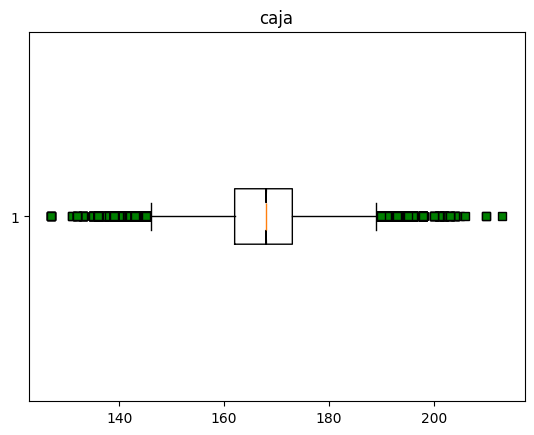

In [5]:
mujeres = tablaJuegosOlimpicos[ tablaJuegosOlimpicos["sex"] == "Female"]
hombres = tablaJuegosOlimpicos[ tablaJuegosOlimpicos["sex"] == "Male"]

alturasM = mujeres["height"].dropna()
alturasH = hombres["height"].dropna()
square = dict(markerfacecolor = "g", marker="s") #s = square
#sns.boxplot(x=alturasM)

fig1 , ax1 = plt.subplots()

ax1.set_title("caja")


plot(x=alturasM, notch=True, flierprops=square, vert=False)




9         167.0
10        167.0
15        167.0
20        184.0
22        184.0
          ...  
314867    183.0
314869    183.0
314871    173.0
314875    183.0
314876    173.0
Name: height, Length: 153007, dtype: object

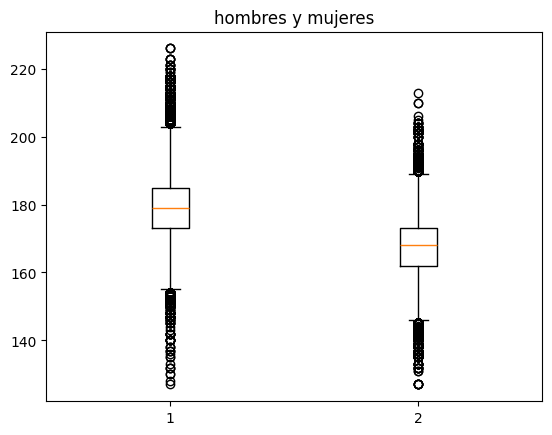

In [14]:
fig3, ax3 = plt.subplots()
alturasM
alturasH
ax3.set_title("hombres y mujeres")
alturasGeneral =[alturasH, alturasM]
ax3.boxplot(alturasGeneral)

alturasH

In [1]:

data = pd.DataFrame({
    'Hombres': alturasH,
    'Mujeres': alturasM
})

plt.xlabel("Conjunto de Datos")
plt.ylabel("Alturas")
sns.boxplot(data=data)





NameError: name 'pd' is not defined

In [ ]:
alturasM.quantile(.75) - alturasM.quantile(.25)

In [ ]:
tablaJuegosOlimpicos.groupby("sex")[["country"]].count() #mostrar una sola columna





In [2]:

tablaJuegosOlimpicos.groupby(["sex", "medal"])[["country"]].aggregate("count").unstack() # unstack ayuda a distribuir mejor cuando se agrupa varias columnas

tablaJuegosOlimpicos.groupby(["sex"]).aggregate("count")

NameError: name 'tablaJuegosOlimpicos' is not defined

In [ ]:


rangos = pd.cut(alturasM, bins=[100,150,200,250]) #catalogar los valors de 100 a 150 de 150 a 200 etc
mujeres.pivot_table("height", index=["country_noc_x", rangos], columns="medal").unstack().reset_index()



#GRAFICAS EN PYTHON DESDE UDEMY


In [ ]:
x = (3,23,4,9,8,7,4,2,3,4,0,9,4,1,2,5,3,2,4,5)



"""
conteo de cada elemento
"""
def conteo(seq):
    hist = {}
    for i in seq:
        hist[i] = hist.get(i,0)+1

    return hist
    

conteo(x)




MXJuegoOlimpicosNA

Text(0.5, 1.0, 'alturas de las feminas')

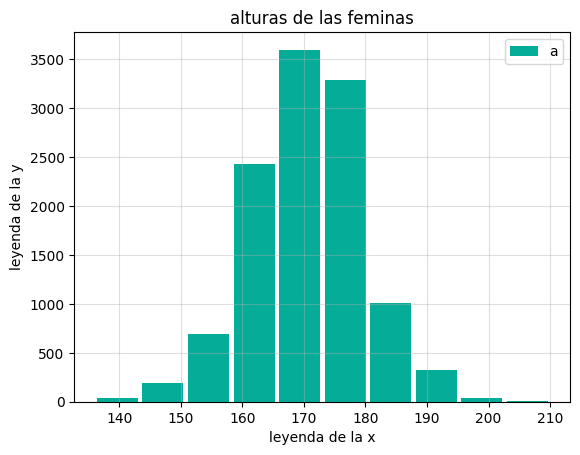

In [ ]:

tablaJuegosOlimpicos = tablaJuegosOlimpicos.dropna()
tablaJuegosOlimpicosF= tablaJuegosOlimpicos[tablaJuegosOlimpicos["sex"] =="Female"]

plt.hist( tablaJuegosOlimpicosF["height"], bins =10, color="#05ad99", rwidth=0.9)
plt.grid(axis="y", alpha=.4)
plt.grid(axis="x", alpha=.4)
plt.xlabel("leyenda de la x")
plt.ylabel("leyenda de la y")
plt.legend("alturas")
plt.title("alturas de las feminas")


<Axes: title={'center': 'Estaturas x Sexo'}, ylabel='Density'>

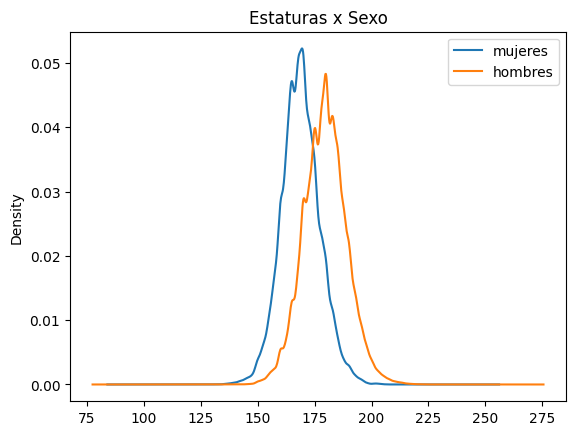

In [ ]:
dataframeAtletas = dataframeAtletas.dropna()
dataframeAtletasF = dataframeAtletas[dataframeAtletas["sex"] == "Female"]
dataframeAtletasH= dataframeAtletas[dataframeAtletas["sex"] == "Male"]

dfSexo  = pd.DataFrame( {
    "mujeres": dataframeAtletasF["height"],
    "hombres": dataframeAtletasH["height"]

})

dfSexo.agg(["min", "max", "mean", "median"])

fig0, ax0 = plt.subplots()


dfSexo.plot.kde(ax= ax0 , title="Estaturas x Sexo")


Text(0, 100, 'rexto de prueba ')

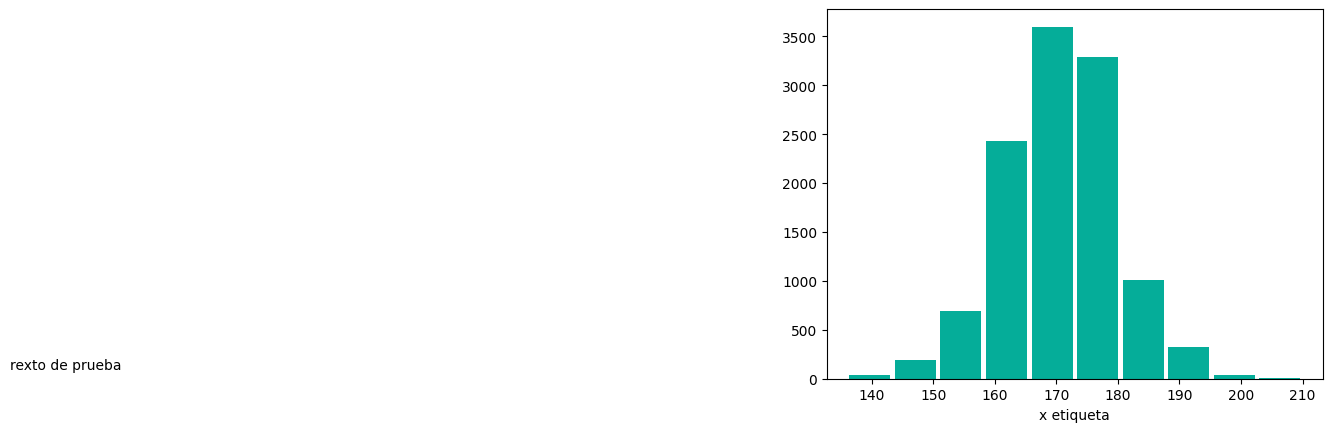

In [ ]:
dataframeAtletasF

plt.hist( tablaJuegosOlimpicosF["height"], bins =10, color="#05ad99", rwidth=0.9)
plt.xlabel("x etiqueta")
plt.text(0,100, "rexto de prueba ")



<Axes: ylabel='Density'>

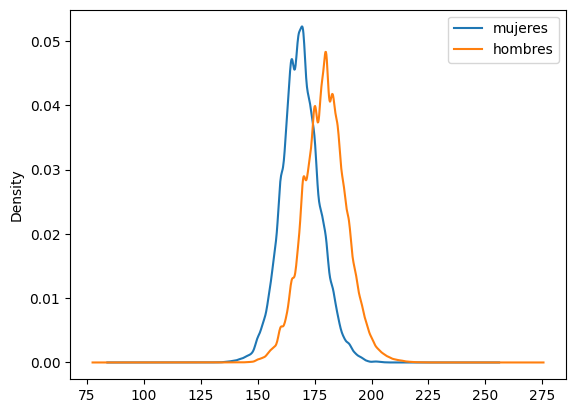

In [ ]:

mu = dataframeAtletasF["height"].mean()
sd = dataframeAtletasF["height"].std()

dfSexo.agg(["min", "max", "mean", "median","std"]).round(decimals=1)


figura, axx = plt.subplots()
dfSexo[["mujeres","hombres"]].plot.kde(ax = axx)





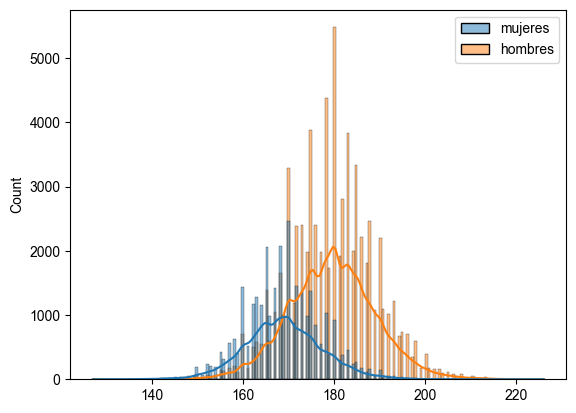

In [ ]:

sns.histplot(dfSexo, kde=True)
sns.set_style("darkgrid")

In [ ]:
pesos =dataframeAtletasF["weight"].dropna()
cortes = (0,50,60,70,80,90,100,np.inf)
etiquetas = ("muy delgado","delgada","regular-1","regular-2","corpulenta","muy corpulenta","muy pesada")

groups =pd.cut(pesos,bins = cortes, labels=etiquetas)
groups.value_counts()


weight
delgada           12396
regular-1         10384
muy delgado        3948
regular-2          3607
corpulenta          716
muy corpulenta      214
muy pesada          144
Name: count, dtype: int64

In [13]:
#MUESTREO
means = []

for i in range(10000):
    sample = altura.sample(n=50, replace=True) #muesta de 50 elementos
    means.append(sample.mean())
    
serie_means = pd.Series(means)

sns.distplot(serie_means, kde=False, norm_hist=True, bins=20) 



NameError: name 'altura' is not defined

C:\Users\TEST\AppData\Local\Temp\ipykernel_16136\132311874.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




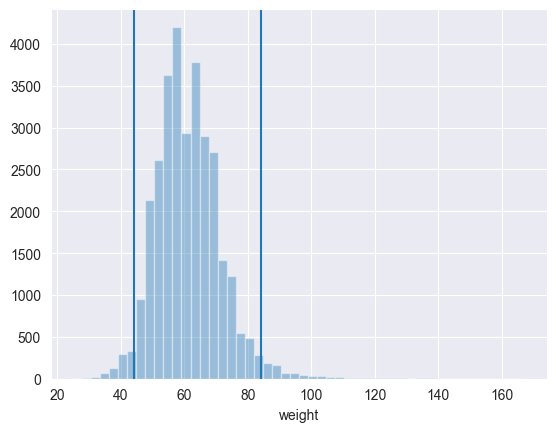

In [ ]:
#INTERVALO DE CONFIANZA


limite_inferior = pesos.quantile(0.025)
limite_superior = pesos.quantile(0.975)


sns.distplot(pesos, kde=False, norm_hist=False)
plt.axvline(limite_inferior)
plt.axvline(limite_superior)





<Axes: >

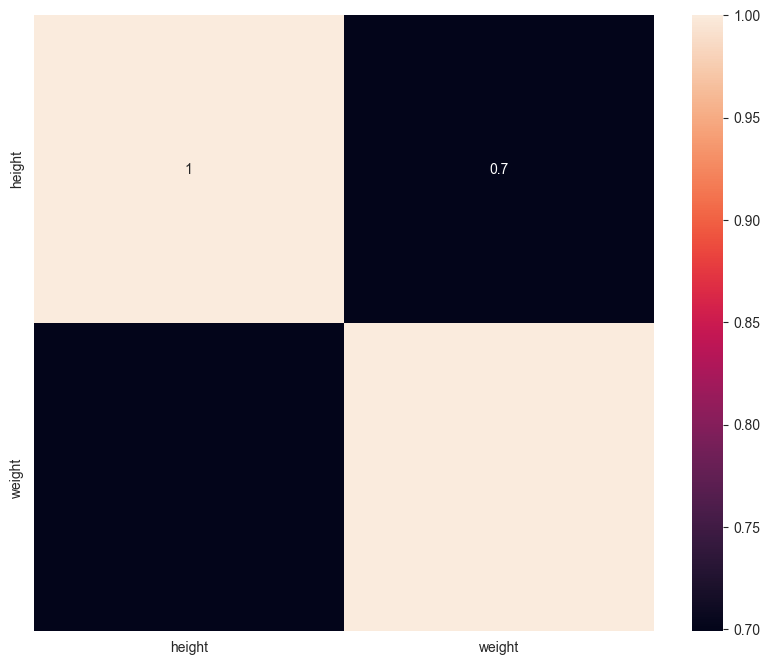

In [ ]:

dfPesoAltura = dataframeAtletasF[["height","weight"]]

dfPesoAltura = dfPesoAltura.dropna()

plt.figure(figsize=(10, 8))
sns.heatmap(dfPesoAltura.corr(), annot=True)



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = dfPesoAltura[["height", "weight"]]
y = dfPesoAltura["weight"]

X_training, X_test, y_training, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)


lr = LinearRegression()
lr.fit(X_training, y_training)

lr.score(X_test, y_test) #precision de los datos para predecir



1.0

In [ ]:
#Entrenamiendo cruzado
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score


scores = cross_validate(lr, x, y, scoring='r2', cv= 10)
scores # tiempos, tiempos,  resultados







{'fit_time': array([0.01562166, 0.02408814, 0.01294494, 0.01251364, 0.01566792,
        0.01813555, 0.00845289, 0.00972414, 0.        , 0.        ]),
 'score_time': array([0.        , 0.00295472, 0.        , 0.        , 0.        ,
        0.00196385, 0.0049777 , 0.00471234, 0.        , 0.        ]),
 'test_score': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])}

[]

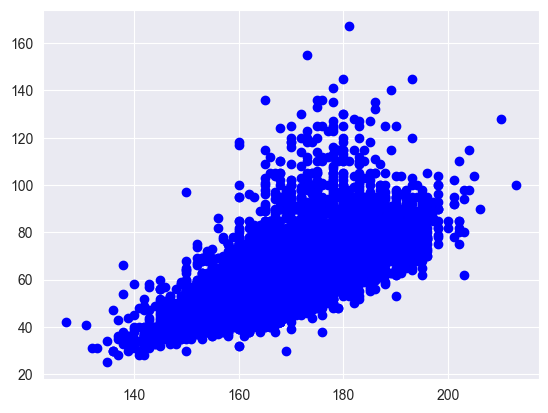

In [ ]:
from sklearn import datasets, linear_model

modelo = linear_model.LinearRegression()


x = dfPesoAltura[["height"]]
y = dfPesoAltura["weight"]

modelo.fit(x,y)

modelo.coef_

plt.scatter(x,y,color="blue")
plt.plot()





In [ ]:


import plotly.express as px
import pandas as pd
import numpy as np
import plotly.io as pio
pio.renderers

dataframeAtletas = pd.read_csv("Olympic_Athlete.csv")
juegosOlimpicos = pd.read_csv("Olympic_Athlete_Event_Results.csv")



#Funcion para convertir a entero o que devuelva NA (1 para entero  2 para float)
def convertirNumero(valor , numero:int):
    try:
        if numero ==1:
            numero = int(valor)
        elif numero == 2:
            numero = float(valor)      
        return numero    
    except ValueError:
        return pd.NA

#Confuncion para devolver NA

def convertirNA(valor):
    if valor == "na":
        return pd.NA
    else:
        return valor
              


#establecer  elsegundo  parametro 
convertirFloat = partial(convertirNumero, numero=2)

#mapeo utiliza la funcion convertirFloat
columna = list( map ( convertirFloat, dataframeAtletas["height"] ))
#mapeo utiliza la funcion convertirFloat
columnaWeight = list( map ( convertirFloat, dataframeAtletas["weight"] ))
#mapeo para devolver NA 
columnaMedalla = list(map(convertirNA, juegosOlimpicos["medal"]))
#reemplazo de nuevas columnas
juegosOlimpicos["medal"] = columnaMedalla
dataframeAtletas["height"] = columna    
dataframeAtletas["weight"] = columnaWeight     


df_grouped = dataframeAtletas.groupby('sex')[['sex', 'country']].max()



df_grouped['count'] = 1
fig = px.treemap(df_grouped, path=['sex', 'country'], values='count')

fig

# 

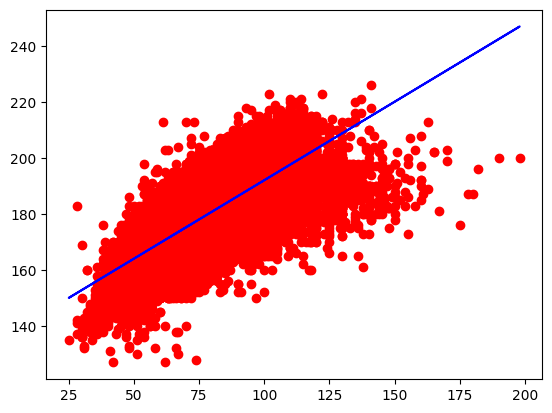

In [ ]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.utils import Bunch



dataframeAtletas =dataframeAtletas.dropna()

#creacion datafram a objeto tipo bunch
bunch = Bunch(data=dataframeAtletas.values, target=dataframeAtletas["height"].values, feature_names=dataframeAtletas.columns)


x = bunch.data[:,np.newaxis,5]  #creacion vector de vectores con newaxis (crea dimension)
y = bunch.target

model = linear_model.LinearRegression()

model.fit(x,y) 


##    y = model.coef_       x  = model_intercept_   sera la regresión lineal  #
model.coef_  #coeficiente de la x 
model.intercept_ #ordenada en el origen



plt.scatter(x,y, color="red")
plt.plot(x, model.predict(x), color = "blue")
plt.show()




,medal,count
0,Gold,15027
1,Bronze,14904
2,Silver,14640


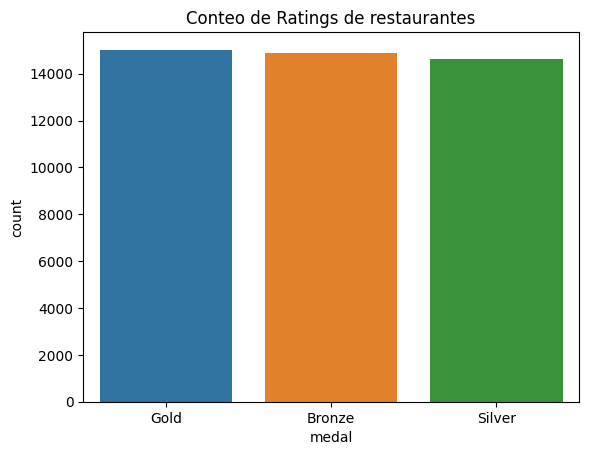

In [12]:


juegosOlimpicos["medal"].nunique() #contador de categorias
contador = juegosOlimpicos["medal"].value_counts()#sumtaria de cada categoria
contador = contador.reset_index()

ax = sns.barplot(x= contador["medal"], y = contador["count"])
ax.set_title('Conteo de Ratings de restaurantes')
ax.set(ylabel='count')

contador


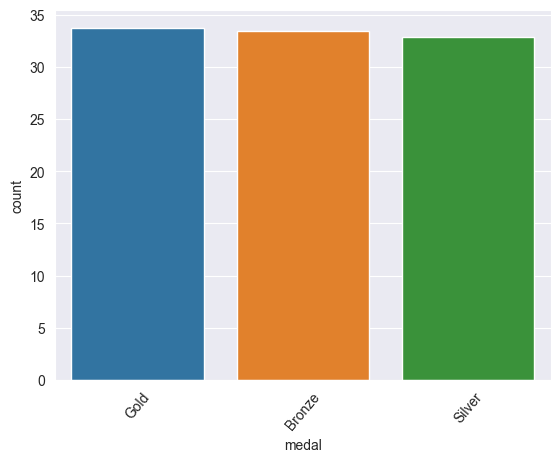

In [ ]:
porcentajeRelativa= contador["count"] * 100 / contador["count"].sum()


ax = sns.barplot(x=contador["medal"], y=porcentajeRelativa)
ax.set_xticklabels(ax.get_xticklabels(), rotation=50);

<Axes: xlabel='height', ylabel='weight'>

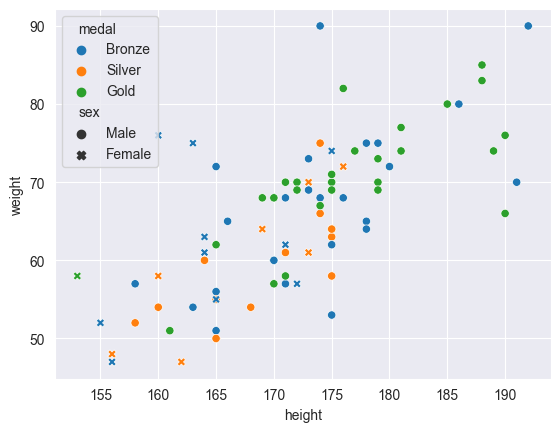

In [ ]:
tablaJuegosOlimpicos["contador"] =1

agrupado = tablaJuegosOlimpicos.groupby("sex")[["height","sport","medal","weight","medal"]].count()

registroJO= tablaJuegosOlimpicos.dropna()

registroJOMX = registroJO[registroJO["country_noc_x"] == "MEX"]


sns.scatterplot(x=registroJOMX['height'], y=registroJOMX['weight'], hue=registroJOMX["medal"],  style=registroJOMX['sex'],marker='s')


<Axes: xlabel='height', ylabel='weight'>

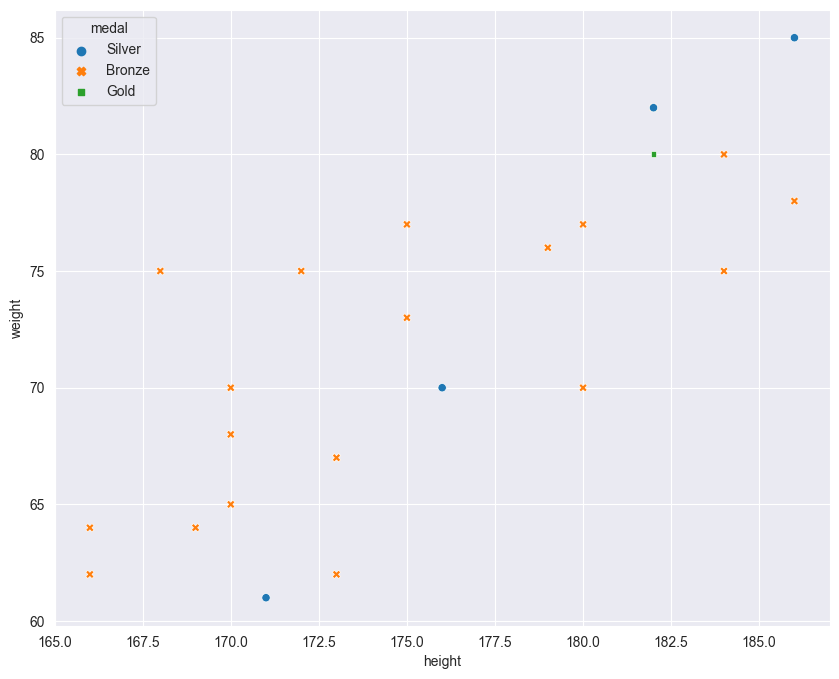

In [ ]:
registroJO

df_ball = registroJO[registroJO['medal'].isin(['Gold', 'Silver', 'Bronze'])]

df_ball = df_ball[df_ball["country_noc_x"]=="CHI"]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot()




sns.scatterplot(x=df_ball['height'], y=df_ball['weight'], hue=df_ball['medal'], style=df_ball['medal'], ax=ax)




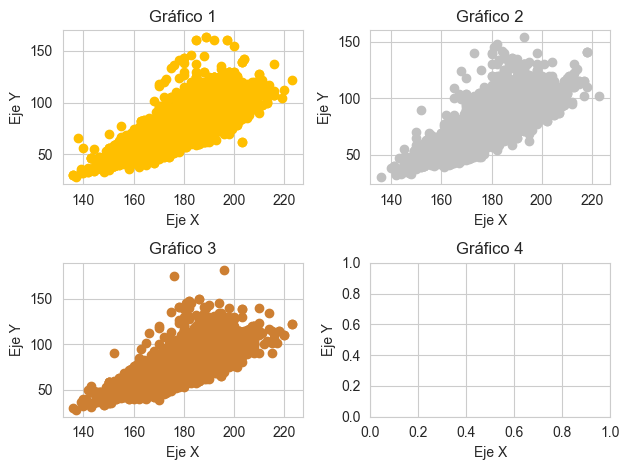

In [ ]:
oro = registroJO[registroJO["medal"] == 'Gold']
plata = registroJO[registroJO['medal'] == 'Silver']
bronce = registroJO[registroJO['medal'] == 'Bronze']

sns.set_style('whitegrid')
palette = ["#223127","#C0C0C0","#CD7F32","#dbbbf5","#ffbf00"]

fig, axs = plt.subplots(2, 2)

axs[0, 0].scatter(oro["height"], oro["weight"], c=palette[4], label='ORO')
axs[0, 1].scatter(plata["height"], plata["weight"], c=palette[1], label='PLATA')
axs[1, 0].scatter(bronce["height"], bronce["weight"], c=palette[2], label='BRONCE')





# Personalizar las etiquetas y títulos
axs[0, 0].set_xlabel('Eje X')
axs[0, 0].set_ylabel('Eje Y')   
axs[0, 0].set_title('Gráfico 1')

axs[0, 1].set_xlabel('Eje X')
axs[0, 1].set_ylabel('Eje Y')
axs[0, 1].set_title('Gráfico 2')

axs[1, 0].set_xlabel('Eje X')
axs[1, 0].set_ylabel('Eje Y')
axs[1, 0].set_title('Gráfico 3')

axs[1, 1].set_xlabel('Eje X')
axs[1, 1].set_ylabel('Eje Y')
axs[1, 1].set_title('Gráfico 4')


plt.tight_layout()
plt.show()

In [ ]:

df_grouped = tablaJuegosOlimpicosF.groupby('sport')[['sex', 'sport','medal']].max()
# 


df_ball = df_grouped[df_grouped['sport'].isin(['Basketball', 'Volleyball', 'Football', 'Baseball'])]


df_grouped.sape

(60, 3)